## Model: Logistic Regression
Attribute Selection: None, using all features

In [12]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error,r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

def interpret_confusion_matrix(matrix,title):
    encode,class_, correct, errors, total = [],[],[],[],[]
    i=0
    for row in matrix:
        class_.append(i)
        total.append(sum(row))
        correct.append(row[i])
        
        consider = row.tolist() 
        del consider[i] #remove correctly classified instances

        errors.append(sum(consider))
        i+=1

    fig = go.Figure(data=[go.Table(columnwidth=5, header=dict(values=["Class","Correctly Classified","Incorrectly Classified","Total"]),
                 cells=dict(values=[class_, correct, errors, total]))
                     ])
    fig.update_layout(title= title,width=550,height=400)
    fig.show()

In [13]:
df = pd.read_csv("Data/DataEncoded.csv")

X=df.iloc[:,:-1]
y=df["NObeyesdad"]

#### Training, Testing

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
logistic_regression = LogisticRegression(random_state=42,max_iter=1000000,solver="newton-cg").fit(X_train,y_train)

#### Visualization

#### Evaluation

Accuracy: 0.8350515463917526
R squared score: 0.9473629609531485
Mean Squared Error Score: 0.2190721649484536

Confusion Matrix
-----------------


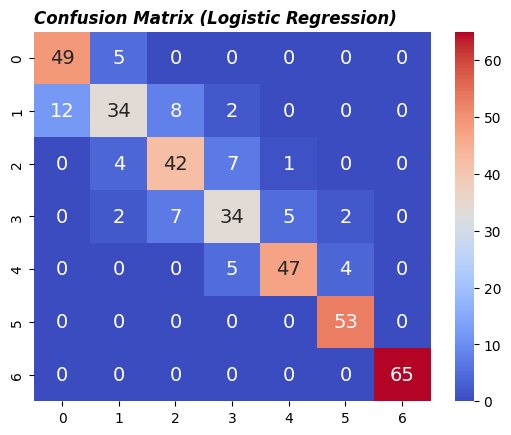

In [15]:
ypred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test,ypred)
cf_matrix = confusion_matrix(y_test,ypred)
r_squared = r2_score(y_test,ypred)
mse = mean_squared_error(y_test,ypred)

print("Accuracy: {0}\nR squared score: {1}\nMean Squared Error Score: {2}".format(accuracy,r_squared,mse))

df_cm = pd.DataFrame(cf_matrix, range(7), range(7))
print("\nConfusion Matrix\n-----------------")
sns.heatmap(df_cm, annot=True, annot_kws={"size": 14},cmap = 'coolwarm',) # font size
plt.title("Confusion Matrix (Logistic Regression)",loc='left', fontweight='bold',  style='italic')
plt.show()

interpret_confusion_matrix(cf_matrix, "Breakdown of Confusion Matrix (Logistic Regression)")        
